In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ohlc, volume_overlay

%matplotlib inline

In [2]:
# 2016年上半期の日経平均のデータを読み込む
start_date = "2016-01-01"
end_date = "2016-06-30"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))
df = df.join(pd.read_csv("n225.csv", index_col="Date", parse_dates=True))
df = df.dropna()

In [3]:
# pandas.DataFrameにデータが格納された
df.head()

,Open,High,Low,Close,Volume,Adj Close
2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,136000.0,18450.980469
2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,128300.0,18374.000000
2016-01-06,18410.570312,18469.380859,18064.300781,18191.320312,142200.0,18191.320312
2016-01-07,18139.769531,18172.039062,17767.339844,17767.339844,163000.0,17767.339844
2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,178800.0,17697.960938


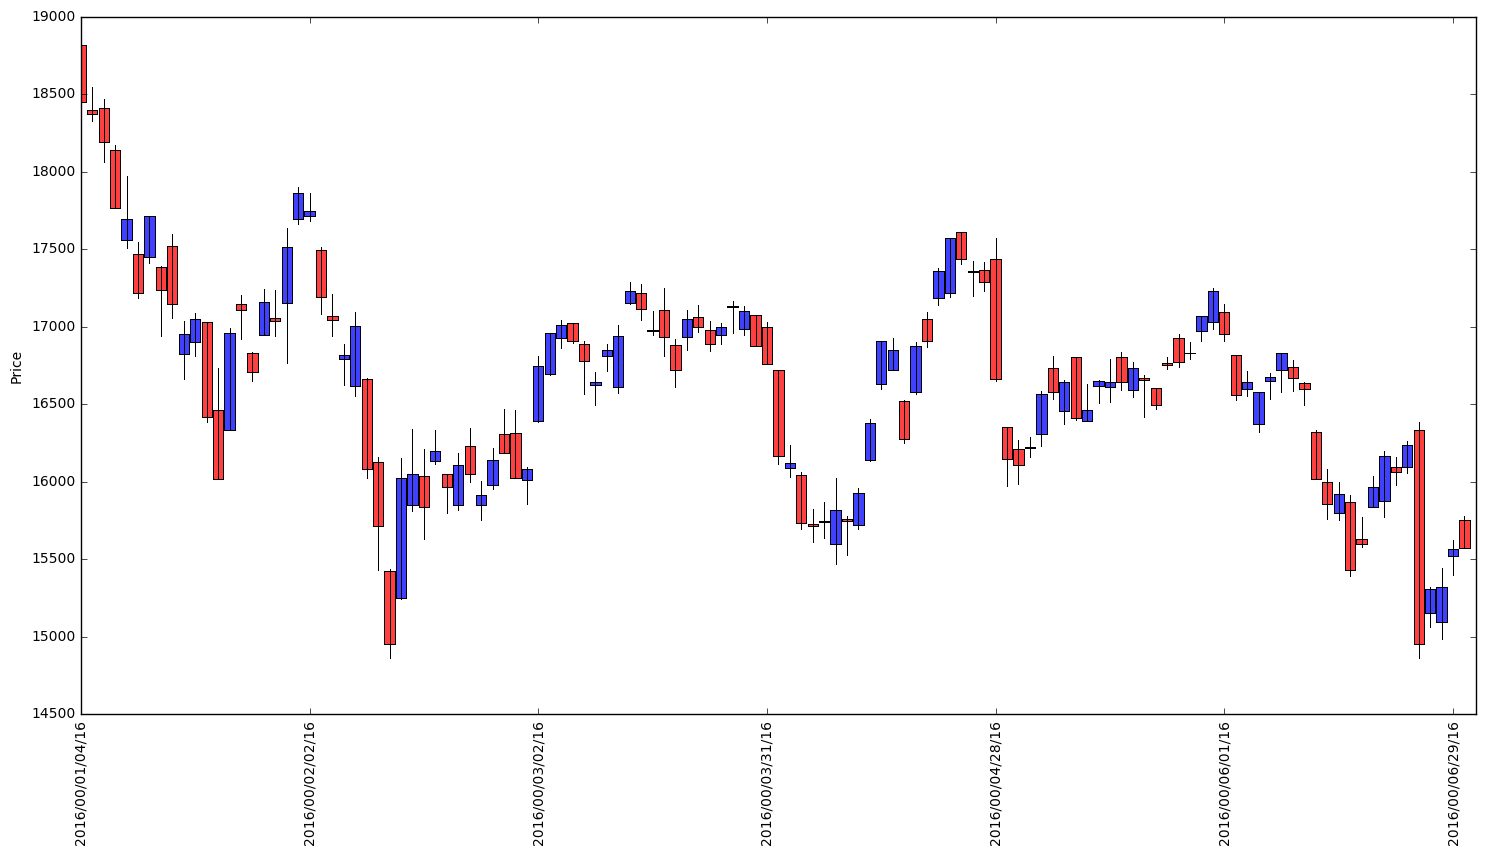

In [4]:
# ローソクだけをプロット
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(1, 1, 1)

# candlestick2を使って描画
candlestick2_ohlc(ax, df["Open"], df["High"], df["Low"], df["Adj Close"], width=0.9, colorup="b", colordown="r")

# 軸メモリやラベルを整える
ax.set_xticklabels([(df.index[int(x)].strftime("%Y/%M/%D") if x <= df.shape[0] else x) for x in ax.get_xticks()], rotation=90)
ax.set_xlim([0, df.shape[0]]) # 横軸の範囲はデータの個数(df.shape[0]個)までに変更しておく
ax.set_ylabel("Price")

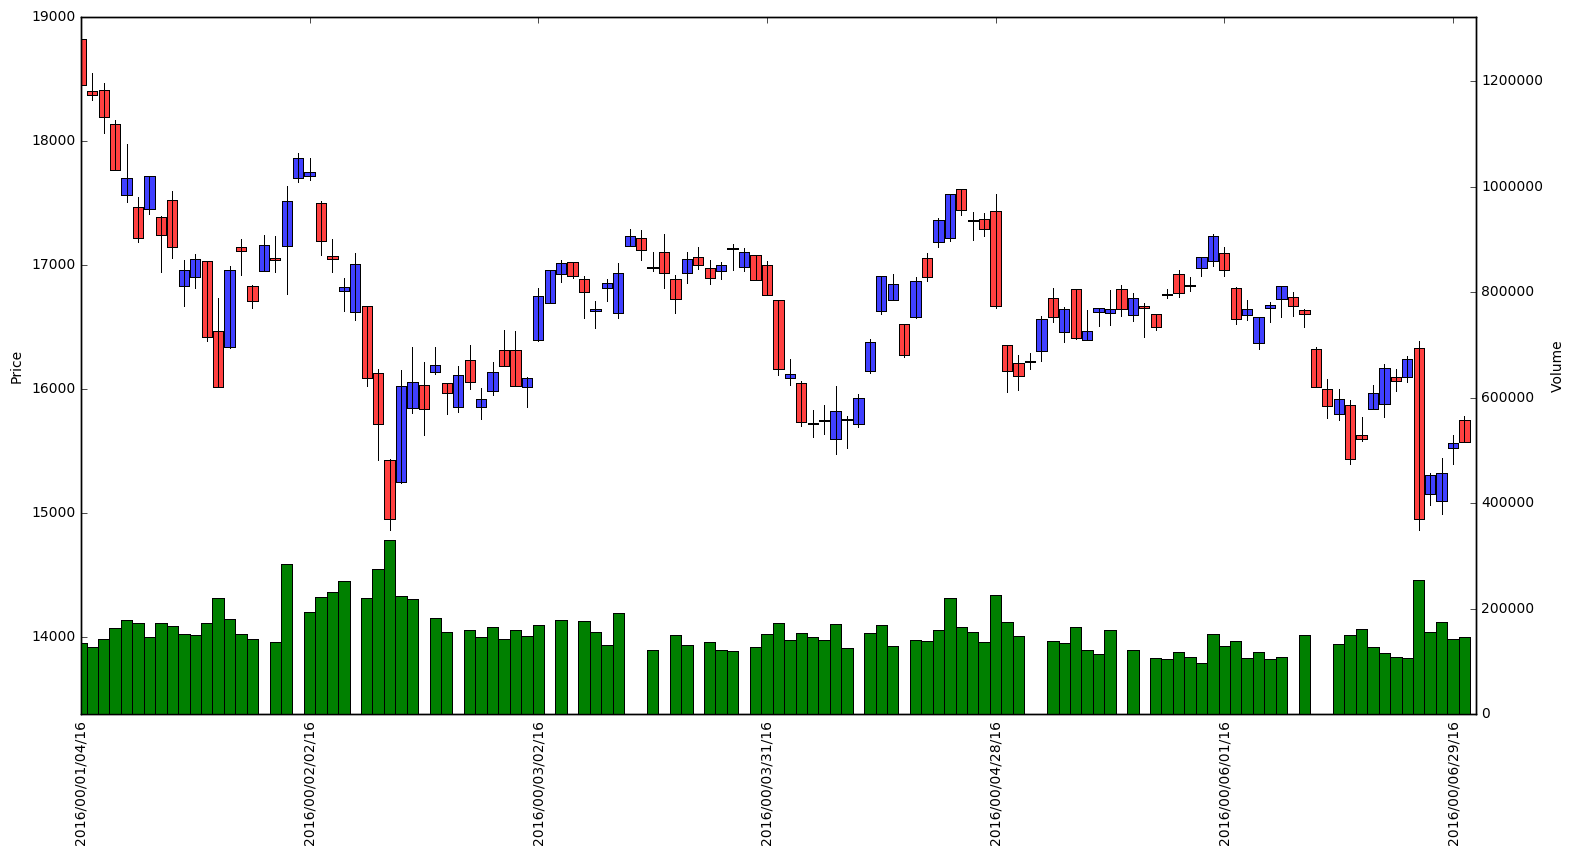

In [5]:
# ローソク足をプロット
fig = plt.figure(figsize=(18, 9))
ax = plt.subplot(1, 1, 1)
candlestick2_ohlc(ax, df["Open"], df["High"], df["Low"], df["Adj Close"], width=0.9, colorup="b", colordown="r")
ax.set_xticklabels([(df.index[int(x)].strftime("%Y/%M/%D") if x <= df.shape[0] else x) for x in ax.get_xticks()], rotation=90)
ax.set_xlim([0, df.shape[0]]) # 横軸の範囲はデータの個数(df.shape[0]個)までに変更しておく
ax.set_ylabel("Price")

# ローソク足を上側75%に収める
bottom, top = ax.get_ylim()
ax.set_ylim(bottom - (top - bottom) / 4, top)


# 出来高のチャートをプロット
ax2 = ax.twinx()
volume_overlay(ax2, df["Open"], df["Adj Close"], df["Volume"], width=1, colorup="g", colordown="g")
ax2.set_xlim([0, df.shape[0]])

# 出来高チャートは下側25%に収める
ax2.set_ylim([0, df["Volume"].max() * 4])
ax2.set_ylabel("Volume")